# Model Test With images

## Importing Required Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Load The Model And Defining Class Labels

In [2]:
new_model = tf.keras.models.load_model('models/Eye_Model1.h5')
class_names = ['Close-Eyes', 'Open-Eyes']

## Loading and Displaying an Image


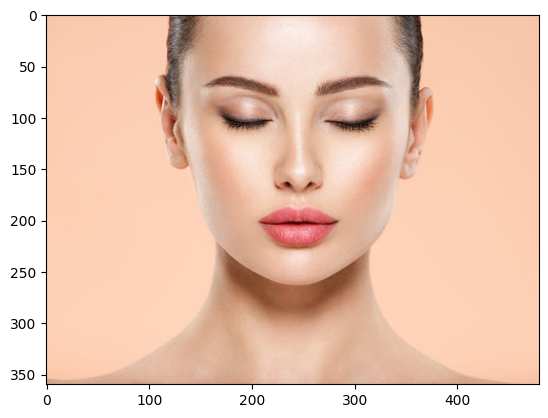

In [3]:
img = cv2.imread("360_F_335536024_XxfITBP7CIkSFw9VLnvixjuzPVXTISRf.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Loading Haar Cascade Classifiers for Face and Eye Detection

We use OpenCV's pre-trained Haar Cascade classifiers to detect faces and eyes in an image.

In [4]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

## Converting the Image to Grayscale

To improve the efficiency of face and eye detection, we convert the image to grayscale. 

In [5]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

## Detecting Faces and Eyes in the Image

We use the Haar cascade classifiers loaded earlier to detect faces and eyes in the image.

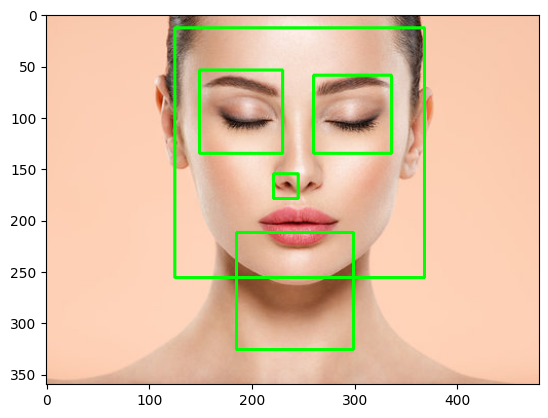

In [6]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

faces = faceCascade.detectMultiScale(img,1.1,5)

for(x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

for(x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## Refining Eye Detection and Extracting the Eye Region

In this section, we further refine the detection of eyes by analyzing regions of interest (ROIs) within detected eye areas.

eyes are not detected


(60, 60, 3)

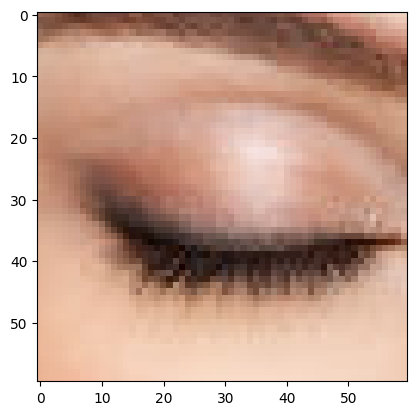

In [7]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = img[y:y+h,x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

eyes_roi.shape

## Preprocessing the Detected Eye Region for Model Prediction

After extracting the eye region from the image, we preprocess it to match the input format required by the deep learning model.

In [8]:
IMAGE_SIZE = 224

final_image = cv2.resize(eyes_roi,(IMAGE_SIZE,IMAGE_SIZE))
final_image = np.expand_dims(final_image,axis=0) ##need fourth dimension
final_image = final_image/255.0

final_image.shape

(1, 224, 224, 3)

## Making Predictions with the Model

Once the eye region image is preprocessed, we use the trained model to make a prediction about whether the eyes are open or closed.

In [9]:
predictions = new_model.predict(final_image)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = round(100 * (np.max(predictions[0])), 2)
print(f"Predicted: {predicted_class}.\n Confidence: {confidence}%")

ValueError: in user code:

    File "c:\Users\Oussama_M\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\Oussama_M\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Oussama_M\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\Oussama_M\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "c:\Users\Oussama_M\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Oussama_M\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(None, 224, 224, 3)


Predicted: Open-Eyes.
Confidence: 99.58%


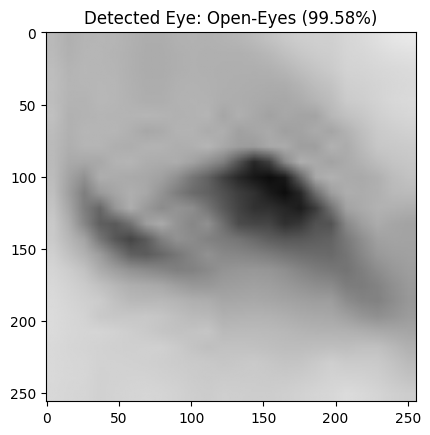

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load trained model
new_model = tf.keras.models.load_model('models/Eye_Model1.h5')
class_names = ['Close-Eyes', 'Open-Eyes']

# Load image
img = cv2.imread("360_F_335536024_XxfITBP7CIkSFw9VLnvixjuzPVXTISRf.jpg")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load Haar cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 5)

# Detect eyes
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

# Extract first detected eye (if found)
eyes_roi = None
for (ex, ey, ew, eh) in eyes:
    eyes_roi = gray[ey:ey+eh, ex:ex+ew]  # Extract eye region
    break  # Take only the first detected eye

# Ensure an eye was found before proceeding
if eyes_roi is not None:
    IMAGE_SIZE = 256  # Ensure it matches model input size
    final_image = cv2.resize(eyes_roi, (IMAGE_SIZE, IMAGE_SIZE))

    # Convert grayscale (1 channel) to RGB (3 channels)
    final_image = cv2.cvtColor(final_image, cv2.COLOR_GRAY2RGB)

    # Expand dimensions to match model input shape: (1, 256, 256, 3)
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image / 255.0  # Normalize

    # Make prediction
    predictions = new_model.predict(final_image)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)

    # Display results
    print(f"Predicted: {predicted_class}.\nConfidence: {confidence}%")

    # Show the detected eye region
    plt.imshow(final_image[0])  # Display as RGB
    plt.title(f"Detected Eye: {predicted_class} ({confidence}%)")
    plt.show()
else:
    print("Eyes not detected.")
